In [ ]:
from scipy.fft import fft, fftfreq
import scipy.signal as sig
import scipy.fftpack as sf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# generat ea signal
Fs = 100 # sample frequency
t = 4 # for 4 sec
n = np.arange(0 , t, 1/Fs)
f = 10 # signal hrz

x = np.sin(2*np.pi*f*n)

In [ ]:
plt.plot(n,x); plt.title('this is singal')
plt.xlabel("time s");plt.ylabel('Amplitude')

In [ ]:
# generate Noice

y = np.random.normal(0, 0.8, np.size(x))
# add it to signal
x=x+y

In [ ]:
plt.plot(n,x); plt.title('this is With noice')
plt.xlabel("time ms");plt.ylabel('Amplitude')

In [ ]:
def fft_denoiser(x, n_components, to_real=True):
    """Fast fourier transform denoiser.
    
    Denoises data using the fast fourier transform.
    
    Parameters
    ----------
    x : numpy.array
        The data to denoise.
    n_components : int
        The value above which the coefficients will be kept.
    to_real : bool, optional, default: True
        Whether to remove the complex part (True) or not (False)
        
    Returns
    -------
    clean_data : numpy.array
        The denoised data.
        
    References
    ----------
    .. [1] Steve Brunton - Denoising Data with FFT[Python]
       https://www.youtube.com/watch?v=s2K1JfNR7Sc&ab_channel=SteveBrunton
    
    """
    n = len(x)
    
    # compute the fft
    fft = np.fft.fft(x, n)
    
    # compute power spectrum density
    # squared magnitud of each fft coefficient
    PSD = fft * np.conj(fft) / n
    
    # keep high frequencies
    _mask = PSD > n_components
    fft = _mask * fft
    
    # inverse fourier transform
    clean_data = np.fft.ifft(fft)
    
    if to_real:
        clean_data = clean_data.real
    
    return clean_data

In [ ]:
aa = fft_denoiser(x, 4, to_real=True)

plt.plot(n,aa); plt.title('this is With noice')
plt.xlabel("time ms");plt.ylabel('Amplitude')

In [ ]:
plt.plot(n,x); plt.title('this is With noice')
plt.xlabel("time ms");plt.ylabel('Amplitude')

In [ ]:
plt.plot(n-y,x); plt.title('this is With noice')
plt.xlabel("time ms");plt.ylabel('Amplitude')

In [ ]:
# take spectral analysis
X_f = abs(sf.fft(x))
l = np.size(x)
fr = (Fs/2)*np.linspace(0,1,int(l/2))
xl_m = (2/l)*abs(X_f[0:np.size(fr)])

In [ ]:
plt.plot(fr, xl_m);plt.title("Spectram on noic=sy signal")

In [ ]:
plt.plot(fr,20*np.log10(xl_m));plt.title("Spectram on noic=sy signal")

In [ ]:
#####################################################33
# New Shit


In [ ]:
################################################

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [ ]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

In [ ]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [ ]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

In [ ]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
N

In [ ]:
SAMPLE_RATE

# all new again


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pywt
#from scipy import signal
from scipy.optimize import curve_fit

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import scipy 
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [2]:
data = pd.read_csv('Microsoft_Stock.csv')
data.Date = pd.to_datetime(data.Date)
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


Text(0, 0.5, 'Close')

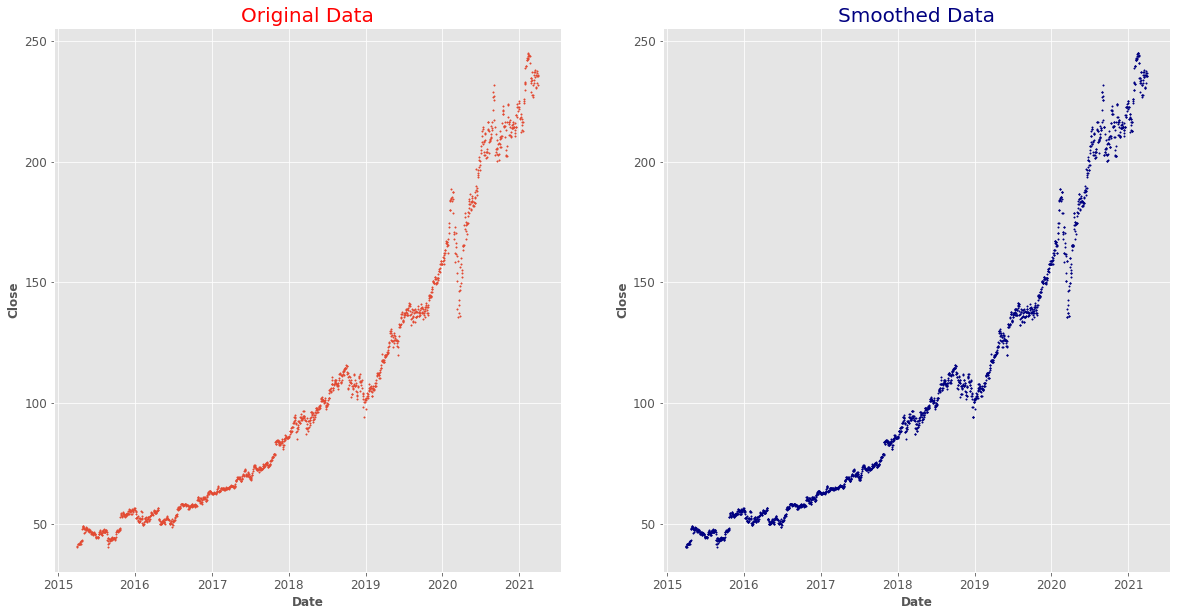

In [3]:
start_date = data.Date.loc[0]
end_date = data.Date.loc[len(data)-1]
start_year = start_date.year
start_month =  start_date.month
start_day = start_date.day
end_year = end_date.year
end_month =  end_date.month
end_day = end_date.day
number_of_days = abs((end_date-start_date).days)
start_date = datetime.date(start_date.year, start_date.month, start_date.day)
date_list = []
for day in range(number_of_days):
    a_date = (start_date + datetime.timedelta(days = day)).isoformat()
    date_list.append(a_date)
date_list = pd.to_datetime(date_list)
new_data = pd.DataFrame({'Date':date_list})
x = new_data.Date
old_x = data.Date
y = []
for i in range(len(x)):
    x_i = x.loc[i]
    diff_list = []
    for j in range(len(data)):
        diff_list.append(abs((x_i-old_x.loc[j]).days))
    diff_list = np.array(diff_list)
    y.append(data.Close[diff_list.argmin()])
        
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original Data',color='red',fontsize=20)
plt.scatter(data.Date,data.Close,s=2)
plt.xlabel('Date')
plt.ylabel('Close')
plt.subplot(1,2,2)
plt.title('Smoothed Data',color='navy',fontsize=20)

plt.scatter(x,y,s=2,color='navy')
plt.xlabel('Date')
plt.ylabel('Close')

In [5]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


Text(0, 0.5, 'Price')

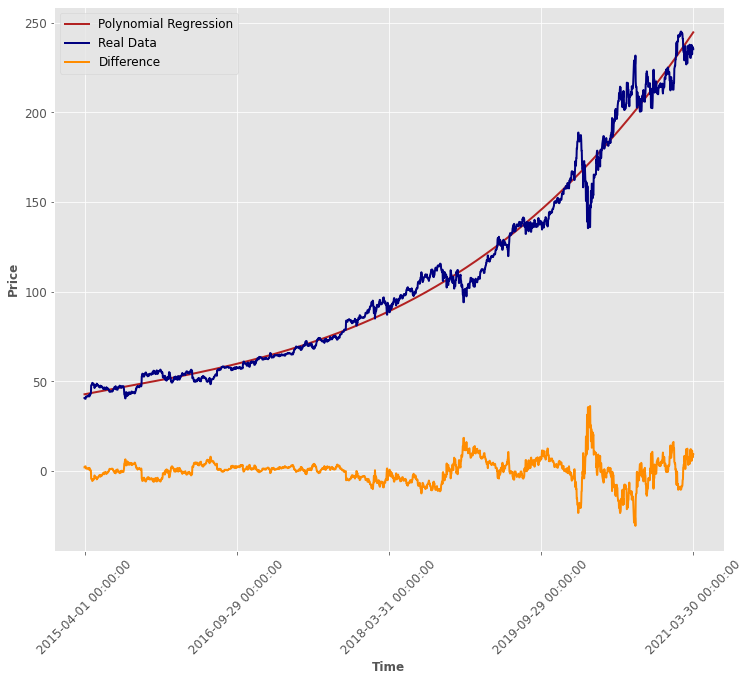

In [6]:
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(new_data.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
# y = 1 * x_0 + 2 * x_1 + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick')
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,reg.predict(X)-y,label='Difference',color='darkorange')
plt.legend()
plt.xticks(x[idx],x[idx],rotation=45)
plt.xlabel('Time')
plt.ylabel('Price')

Text(0, 0.5, 'Fourier Amplitude')

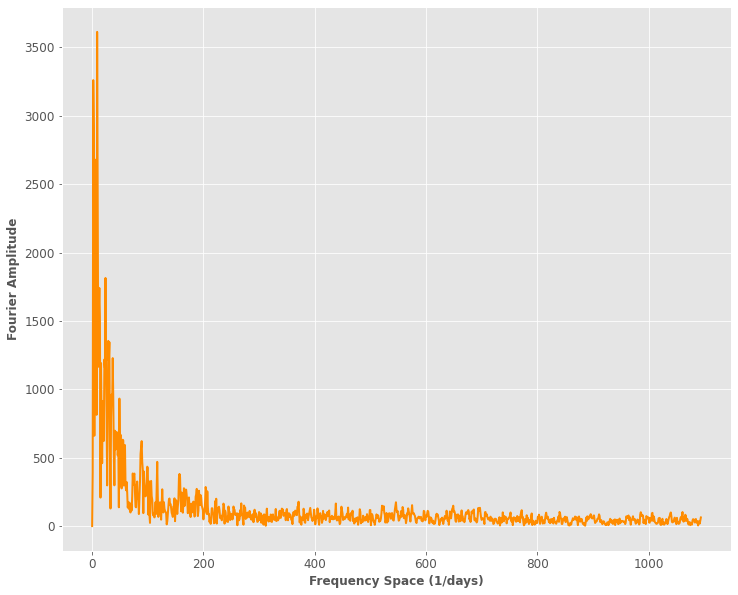

In [7]:
signal = reg.predict(X)-y
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2.)],color='darkorange')
plt.xlabel('Frequency Space (1/days)')
plt.ylabel('Fourier Amplitude')

In [8]:
y_detrend = y.copy()
FFT =np.fft.fft(y_detrend)
new_N=int(len(FFT)/2)
f_nat=1
np.linspace(10**-12, f_nat/2, new_N, endpoint=True)
new_X = np.linspace(10**-12, f_nat/2, new_N, endpoint=True)
new_Xph=1.0/(new_X)

In [14]:
len(new_Xph)

1095

In [16]:
len(fft_signal[0:int(len(signal)/2.)])

1095

In [20]:
len(fft_signal)/2

1095.5

In [10]:
def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

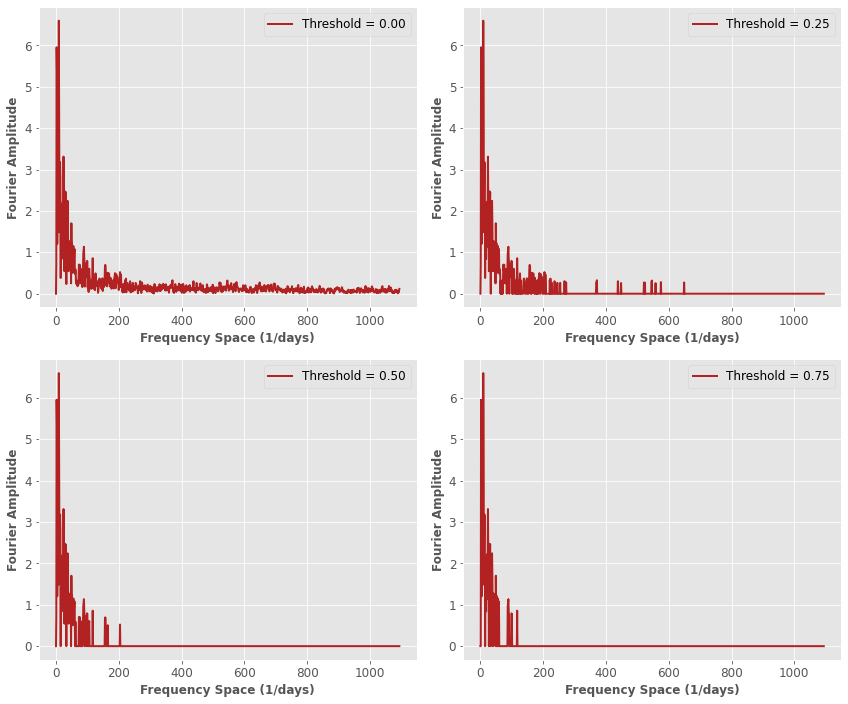

In [11]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space (1/days)')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

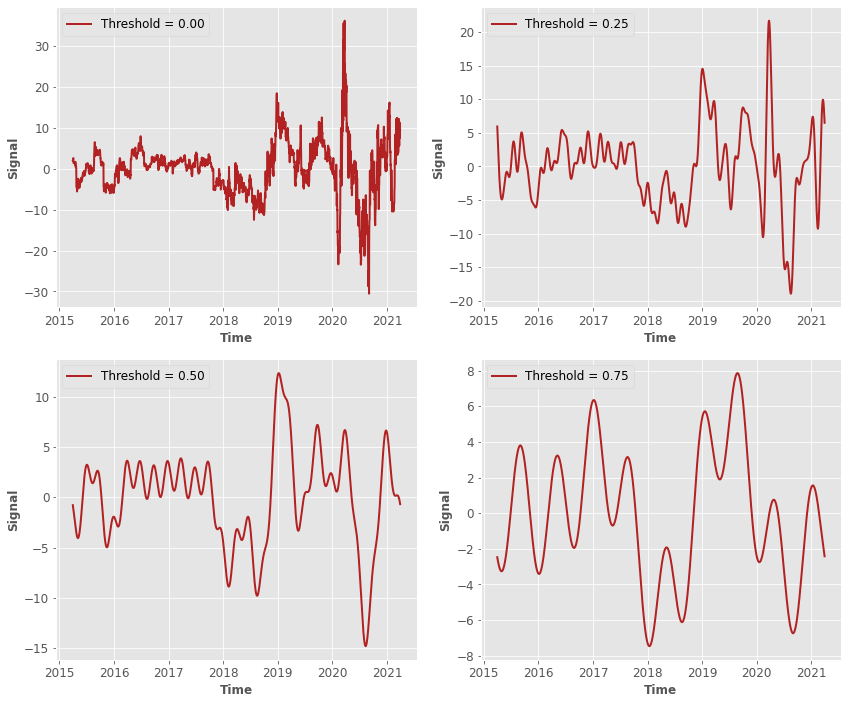

In [12]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

In [ ]:
th_example_value = 0.10
example_signal = filter_signal(th_example_value)
plt.plot(x,signal,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_example_value))
plt.plot(x,signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

In [ ]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [ ]:
th_opt = th_list[np.array(corr_values).argmin()]
opt_signal = filter_signal(th_opt)
plt.plot(x[1000:1100],signal[1000:1100],color='navy',label='Original Signal')
plt.plot(x[1000:1100],opt_signal[1000:1100],color='firebrick',label='Optimal signal (Th=%.3f)'%(th_opt))
plt.plot(x[1000:1100],(signal-opt_signal)[1000:1100],color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

In [ ]:
th_opt = th_list[np.array(corr_values).argmin()]
opt_signal = filter_signal(0.05)
plt.plot(x[1000:1100],signal[1000:1100],color='navy',label='Original Signal')
plt.plot(x[1000:1100],opt_signal[1000:1100],color='firebrick',label='Filtered signal (Th=%.3f)'%(0.05))
plt.plot(x[1000:1100],(signal-opt_signal)[1000:1100],color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()